In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import regex as re
import nltk
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud
import random

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
from unicodedata import normalize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cristinabautista/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cristinabautista/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('tweets_public.csv', encoding='utf-8')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7867 entries, 0 to 7866
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  7867 non-null   object
 1   is_reply           7867 non-null   bool  
 2   reply_count        7867 non-null   int64 
 3   retweet_count      7867 non-null   int64 
 4   text               7867 non-null   object
 5   tweet_coord        20 non-null     object
 6   tweet_created      7867 non-null   object
 7   tweet_id           7867 non-null   int64 
 8   tweet_location     419 non-null    object
 9   user_timezone      5100 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 561.0+ KB


In [7]:
df = df[['airline_sentiment','is_reply','text','tweet_created']]

In [8]:
df

,airline_sentiment,is_reply,text,tweet_created
0,neutral,False,Trabajar en #Ryanair como #TMA: https://t.co/r...,Fri Nov 03 12:05:12 +0000 2017
1,neutral,True,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,Sun Nov 26 18:40:28 +0000 2017
2,negative,False,Sabiais que @Iberia te trata muy bien en santi...,Mon Dec 25 15:40:45 +0000 2017
3,negative,False,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,Mon Nov 06 14:18:35 +0000 2017
4,positive,True,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,Mon Jan 01 23:00:57 +0000 2018
...,...,...,...,...
7862,negative,True,@Iberia @iberiaexpress especialistas en dejart...,Thu Dec 28 22:34:23 +0000 2017
7863,neutral,False,"Con @Iberia, mi destino a un solo click. ¡Dese...",Wed Nov 29 18:59:49 +0000 2017
7864,positive,True,@Iberia Muy bien. Muchas gracias,Tue Dec 26 21:38:36 +0000 2017
7865,negative,False,Es que volar con Ryanair es peor que irte a ch...,Tue Dec 19 09:08:35 +0000 2017


## Preprocesamiento

### Texto a minúsculas

In [9]:
for columns in df.columns:
    if columns in ('airline_sentiment', 'text'):
        df[columns] = df[columns].str.lower() 

### Eliminar URLs y Tags a personas

In [10]:
for columns in df.columns:
    if columns in ('text'):
        df[columns] = df[columns].str.replace(r'@\S+|http\S+', '')

/var/folders/pr/74mzrgzd55x0p441b4ngq4740000gr/T/ipykernel_30623/882002935.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[columns] = df[columns].str.replace(r'@\S+|http\S+', '')


In [11]:
df.text.head

<bound method NDFrame.head of 0                trabajar en #ryanair como #tma:  #empleo
1         cuando gusten en cancún se viaja y disfruta ...
2       sabiais que  te trata muy bien en santiago de ...
3       nunca nunca nunca pidáis el café de ryanair.\n...
4                                          muchos éxito… 
                              ...                        
7862      especialistas en dejarte tirado en navidad!😢...
7863    con  mi destino a un solo click. ¡deseadme sue...
7864                             muy bien. muchas gracias
7865    es que volar con ryanair es peor que irte a ch...
7866    iberia inaugura un nuevo espacio premium para ...
Name: text, Length: 7867, dtype: object>

### Eliminar caracteres especiales 

In [12]:
for columns in df.columns:
    if columns in ('text'):
        df[columns] = df[columns].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
for columns in df.columns:
    if columns in ('text'):
        df[columns] = df[columns].str.replace(r'[^A-Za-z\s]+', '')

/var/folders/pr/74mzrgzd55x0p441b4ngq4740000gr/T/ipykernel_30623/3459997061.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[columns] = df[columns].str.replace(r'[^A-Za-z\s]+', '')


### Tokenization 

In [13]:
tokenizer = RegexpTokenizer(r'\w+')
for columns in df.columns:
    if columns in ('text'):
        df[columns] = df[columns].apply(lambda x: tokenizer.tokenize(x))

### Stopwords 

In [14]:
stopwords = stopwords.words('spanish')

In [15]:
df.text = df.text.apply(lambda y: [w for w in y if w not in stopwords])

In [16]:
df.text

0                        [trabajar, ryanair, tma, empleo]
1        [gusten, cancun, viaja, disfruta, manera, igual]
2       [sabiais, trata, bien, santiago, chilete, camb...
3       [nunca, nunca, nunca, pidais, cafe, ryanair, b...
4                                                 [exito]
                              ...                        
7862    [especialistas, dejarte, tirado, navidad, novu...
7863    [destino, solo, click, deseadme, suerte, holac...
7864                              [bien, muchas, gracias]
7865    [volar, ryanair, peor, irte, chingar, madre, c...
7866    [iberia, inaugura, nuevo, espacio, premium, se...
Name: text, Length: 7867, dtype: object

In [17]:
df

,airline_sentiment,is_reply,text,tweet_created
0,neutral,False,"[trabajar, ryanair, tma, empleo]",Fri Nov 03 12:05:12 +0000 2017
1,neutral,True,"[gusten, cancun, viaja, disfruta, manera, igual]",Sun Nov 26 18:40:28 +0000 2017
2,negative,False,"[sabiais, trata, bien, santiago, chilete, camb...",Mon Dec 25 15:40:45 +0000 2017
3,negative,False,"[nunca, nunca, nunca, pidais, cafe, ryanair, b...",Mon Nov 06 14:18:35 +0000 2017
4,positive,True,[exito],Mon Jan 01 23:00:57 +0000 2018
...,...,...,...,...
7862,negative,True,"[especialistas, dejarte, tirado, navidad, novu...",Thu Dec 28 22:34:23 +0000 2017
7863,neutral,False,"[destino, solo, click, deseadme, suerte, holac...",Wed Nov 29 18:59:49 +0000 2017
7864,positive,True,"[bien, muchas, gracias]",Tue Dec 26 21:38:36 +0000 2017
7865,negative,False,"[volar, ryanair, peor, irte, chingar, madre, c...",Tue Dec 19 09:08:35 +0000 2017


In [18]:
df['airline_sentiment_score'] = df.loc[:, 'airline_sentiment']
df.airline_sentiment_score.replace({"positive": 1, "neutral": 0, "negative": -1}, inplace=True)

In [19]:
df

,airline_sentiment,is_reply,text,tweet_created,airline_sentiment_score
0,neutral,False,"[trabajar, ryanair, tma, empleo]",Fri Nov 03 12:05:12 +0000 2017,0
1,neutral,True,"[gusten, cancun, viaja, disfruta, manera, igual]",Sun Nov 26 18:40:28 +0000 2017,0
2,negative,False,"[sabiais, trata, bien, santiago, chilete, camb...",Mon Dec 25 15:40:45 +0000 2017,-1
3,negative,False,"[nunca, nunca, nunca, pidais, cafe, ryanair, b...",Mon Nov 06 14:18:35 +0000 2017,-1
4,positive,True,[exito],Mon Jan 01 23:00:57 +0000 2018,1
...,...,...,...,...,...
7862,negative,True,"[especialistas, dejarte, tirado, navidad, novu...",Thu Dec 28 22:34:23 +0000 2017,-1
7863,neutral,False,"[destino, solo, click, deseadme, suerte, holac...",Wed Nov 29 18:59:49 +0000 2017,0
7864,positive,True,"[bien, muchas, gracias]",Tue Dec 26 21:38:36 +0000 2017,1
7865,negative,False,"[volar, ryanair, peor, irte, chingar, madre, c...",Tue Dec 19 09:08:35 +0000 2017,-1


In [20]:
df.text

0                        [trabajar, ryanair, tma, empleo]
1        [gusten, cancun, viaja, disfruta, manera, igual]
2       [sabiais, trata, bien, santiago, chilete, camb...
3       [nunca, nunca, nunca, pidais, cafe, ryanair, b...
4                                                 [exito]
                              ...                        
7862    [especialistas, dejarte, tirado, navidad, novu...
7863    [destino, solo, click, deseadme, suerte, holac...
7864                              [bien, muchas, gracias]
7865    [volar, ryanair, peor, irte, chingar, madre, c...
7866    [iberia, inaugura, nuevo, espacio, premium, se...
Name: text, Length: 7867, dtype: object

## Data Análisis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [22]:
fig = px.histogram(df, x="airline_sentiment_score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

In [23]:
stemmer = PorterStemmer()
def word_stemmer(data): 
    stem_text = " ".join([stemmer.stem(i) for i in data])
    return stem_text

In [24]:
df['text_stemmer'] = df.loc[:, 'text']
df.text_stemmer = df.text_stemmer.apply(lambda x: word_stemmer(x))
df['text_string'] = df.loc[:,'text']
df.text_string = df.text_string.apply(lambda x: ' '.join(map(str, x)))

In [25]:
df.drop_duplicates(subset="text_stemmer",keep=False, inplace=True)

In [26]:
df

,airline_sentiment,is_reply,text,tweet_created,airline_sentiment_score,text_stemmer,text_string
1,neutral,True,"[gusten, cancun, viaja, disfruta, manera, igual]",Sun Nov 26 18:40:28 +0000 2017,0,gusten cancun viaja disfruta manera igual,gusten cancun viaja disfruta manera igual
2,negative,False,"[sabiais, trata, bien, santiago, chilete, camb...",Mon Dec 25 15:40:45 +0000 2017,-1,sabiai trata bien santiago chilet cambia asien...,sabiais trata bien santiago chilete cambia asi...
3,negative,False,"[nunca, nunca, nunca, pidais, cafe, ryanair, b...",Mon Nov 06 14:18:35 +0000 2017,-1,nunca nunca nunca pidai cafe ryanair bueno ven...,nunca nunca nunca pidais cafe ryanair bueno ve...
4,positive,True,[exito],Mon Jan 01 23:00:57 +0000 2018,1,exito,exito
5,positive,True,"[wow, bonito, solo, volado, unas, veces, siemp...",Mon Jan 01 21:15:34 +0000 2018,1,wow bonito solo volado una vece siempr tierra,wow bonito solo volado unas veces siempre tierra
...,...,...,...,...,...,...,...
7860,negative,False,"[maldad, serrat, hizo, lucia, azafata, iberia,...",Wed Dec 13 14:29:32 +0000 2017,-1,maldad serrat hizo lucia azafata iberia amo via,maldad serrat hizo lucia azafata iberia amo via
7861,negative,False,"[tranquilidad, da, saber, siempre, llegas, pun...",Mon Dec 18 21:30:38 +0000 2017,-1,tranquilidad da saber siempr llega puntualidad...,tranquilidad da saber siempre llegas puntualid...
7862,negative,True,"[especialistas, dejarte, tirado, navidad, novu...",Thu Dec 28 22:34:23 +0000 2017,-1,especialista dejart tirado navidad novuelescon...,especialistas dejarte tirado navidad novuelesc...
7864,positive,True,"[bien, muchas, gracias]",Tue Dec 26 21:38:36 +0000 2017,1,bien mucha gracia,bien muchas gracias


In [27]:
df = df[['text','airline_sentiment_score']]

In [28]:
df

,text,airline_sentiment_score
1,"[gusten, cancun, viaja, disfruta, manera, igual]",0
2,"[sabiais, trata, bien, santiago, chilete, camb...",-1
3,"[nunca, nunca, nunca, pidais, cafe, ryanair, b...",-1
4,[exito],1
5,"[wow, bonito, solo, volado, unas, veces, siemp...",1
...,...,...
7860,"[maldad, serrat, hizo, lucia, azafata, iberia,...",-1
7861,"[tranquilidad, da, saber, siempre, llegas, pun...",-1
7862,"[especialistas, dejarte, tirado, navidad, novu...",-1
7864,"[bien, muchas, gracias]",1


In [29]:
df = df.explode('text').reset_index(drop=True)
# df.to_csv("tweets_separados_completos.csv")
# df

In [30]:
# df = pd.read_csv('tweets_clasificados.csv', encoding='utf-8')
df

,text,airline_sentiment_score
0,gusten,0
1,cancun,0
2,viaja,0
3,disfruta,0
4,manera,0
...,...,...
49755,irte,-1
49756,chingar,-1
49757,madre,-1
49758,culpa,-1


### Separación de comentarios

In [31]:
positive = df[df['airline_sentiment_score'] == 1]
neutral = df[df['airline_sentiment_score'] == 0]
negative = df[df['airline_sentiment_score'] == -1]

In [32]:
positive

,text,airline_sentiment_score
26,exito,1
27,wow,1
28,bonito,1
29,solo,1
30,volado,1
...,...,...
49564,euros,1
49565,via,1
49749,bien,1
49750,muchas,1


In [33]:
neutral

,text,airline_sentiment_score
0,gusten,0
1,cancun,0
2,viaja,0
3,disfruta,0
4,manera,0
...,...,...
49721,airlines,0
49722,madridiberia,0
49723,airlines,0
49724,chilelathan,0


In [34]:
negative

,text,airline_sentiment_score
6,sabiais,-1
7,trata,-1
8,bien,-1
9,santiago,-1
10,chilete,-1
...,...,...
49755,irte,-1
49756,chingar,-1
49757,madre,-1
49758,culpa,-1


In [35]:
# df.drop_duplicates(subset="text",keep=False, inplace=True)
# df_duplicate = df[df.duplicated(keep=False)]
# df_duplicate
# df_duplicate.to_csv("Duplicados.csv")

In [36]:
df.drop_duplicates(subset="text",keep=False, inplace=True)

### Wordcloud - Sentimiento Positivo

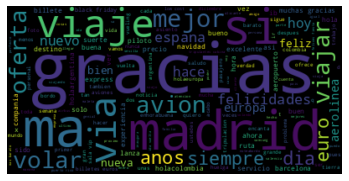

In [37]:
stopwords = set(STOPWORDS)
stopwords.update(["ryanair","iberia","vuelo","ano","vuelos"])
pos = " ".join(comentario for comentario in positive.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud - Sentimiento Neutro

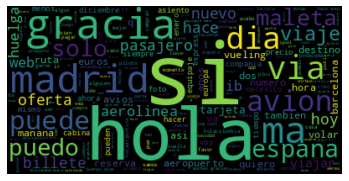

In [38]:
stopwords = set(STOPWORDS)
stopwords.update(["ryanair","iberia","vuelo","ano","vuelos"])
pos = " ".join(comentario for comentario in neutral.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud - Sentimiento Negativo

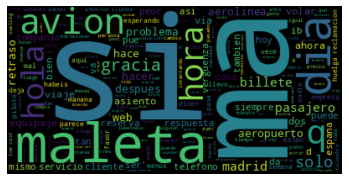

In [39]:
stopwords = set(STOPWORDS)
stopwords.update(["ryanair","iberia","vuelo","ano","vuelos"])
pos = " ".join(comentario for comentario in negative.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
data = df[['airline_sentiment_score','text']]

In [41]:
data

,airline_sentiment_score,text
6,-1,sabiais
10,-1,chilete
12,-1,asientote
15,-1,wc
16,-1,traseroe
...,...,...
49725,0,airli
49726,-1,maldad
49732,-1,amo
49741,-1,especialistas


## Modelado

### Split Train and Test

In [42]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix,classification_report

In [43]:
# index = df.index
# data['random_no'] = np.random.randn(len(index))
# train = data[data['random_no'] <= 0.7]
# test = data[data['random_no'] > 0.7]

In [44]:
# train

In [45]:
# vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# train_matrix = vectorizer.fit_transform(train['text_stemmer'])
# test_matrix = vectorizer.transform(test['text_stemmer'])

In [46]:
# lr = LogisticRegression(solver='lbfgs', max_iter=10000)

In [47]:
# X_train = train_matrix
# X_test = test_matrix
# y_train = train['airline_sentiment_score']
# y_test = test['airline_sentiment_score']

In [48]:
# lr.fit(X_train,y_train)

In [49]:
# predictions = lr.predict(X_test)

In [50]:
# predictions

In [51]:
# new = np.asarray(y_test)
# confusion_matrix(predictions,y_test)

In [52]:
# print(classification_report(predictions,y_test))

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 6 to 49756
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   airline_sentiment_score  6953 non-null   int64 
 1   text                     6953 non-null   object
dtypes: int64(1), object(1)
memory usage: 163.0+ KB


### Segundo intento

In [54]:
# data["intento"] = 0
X = data['text'].values
y = data['airline_sentiment_score'].values

In [55]:
data

,airline_sentiment_score,text
6,-1,sabiais
10,-1,chilete
12,-1,asientote
15,-1,wc
16,-1,traseroe
...,...,...
49725,0,airli
49726,-1,maldad
49732,-1,amo
49741,-1,especialistas


In [56]:
data

,airline_sentiment_score,text
6,-1,sabiais
10,-1,chilete
12,-1,asientote
15,-1,wc
16,-1,traseroe
...,...,...
49725,0,airli
49726,-1,maldad
49732,-1,amo
49741,-1,especialistas


In [57]:
max(data['text'].value_counts())

1

In [58]:
data['airline_sentiment_score'].value_counts()

-1    3695
 0    2214
 1    1044
Name: airline_sentiment_score, dtype: int64

Nos podemos dar cuenta que están desbalanceado los datos, de aquí hay dos caminos, under_sampling o over_sampling, si hacemos under_sampling la mayor cantidad de datos que pueden tener las 3 categorías sería de 1104 (muy poco para entrenar) por otro lado si se escoge over_sampling la mayor cantidad de datos que pueden tener las 3 categorías sería de 3291 (mejor)

Se escogió el over_sampling con RandomOverSampler en vez de SMOTE, ya que SMOTE necesita que columnas sean de tipo de dato numérico, en cambio RandomOverSampler tiene la ventaja de utilizar columnas de tipo String con Int

In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
a = data[['text', 'airline_sentiment_score']]
b = data['airline_sentiment_score']

In [60]:
X_res, y_res = ros.fit_resample(a, b)

In [61]:
X_res.value_counts()

text         airline_sentiment_score
cuernos       1                         10
medialunas    1                          9
quince        1                          9
madscq        1                          9
suf           1                          8
                                        ..
explotacion   0                          1
explorando   -1                          1
expliquenme  -1                          1
explique      0                          1
infografia   -1                          1
Length: 6953, dtype: int64

In [62]:
y_res.value_counts()

-1    3695
 0    3695
 1    3695
Name: airline_sentiment_score, dtype: int64

In [63]:
X_res = X_res['text'].values

Dejamos 70% de entrenamiento y 30% de test

In [64]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=5)

print('Cantidad de textos de entrenamiento: {}'.format(len(X_train)))
print('Cantidad de textos de test: {}'.format(len(X_test)))

Cantidad de textos de entrenamiento: 7759
Cantidad de textos de test: 3326


In [65]:
print(X_train, "\n\n", X_test, "\n\n", y_train, "\n\n", y_test)

['saltillo' 'entendi' 'inconvenientes' ... 'monacor' 'blanca' 'conductor'] 

 ['empiezas' 'mayalen' 'decimos' ... 'badajoz' 'aduce' 'absorcio'] 

 5998   -1
4833    0
5015    0
8634    1
8793    1
       ..
3046    0
9917    1
4079    1
2254    0
2915    0
Name: airline_sentiment_score, Length: 7759, dtype: int64 

 1260     0
5012    -1
4431     1
8669     1
5952     0
        ..
10400    1
10517    1
2104     0
3873    -1
564     -1
Name: airline_sentiment_score, Length: 3326, dtype: int64


De una manera más visual se mostrará la distribución de los target de Train y Test

[]

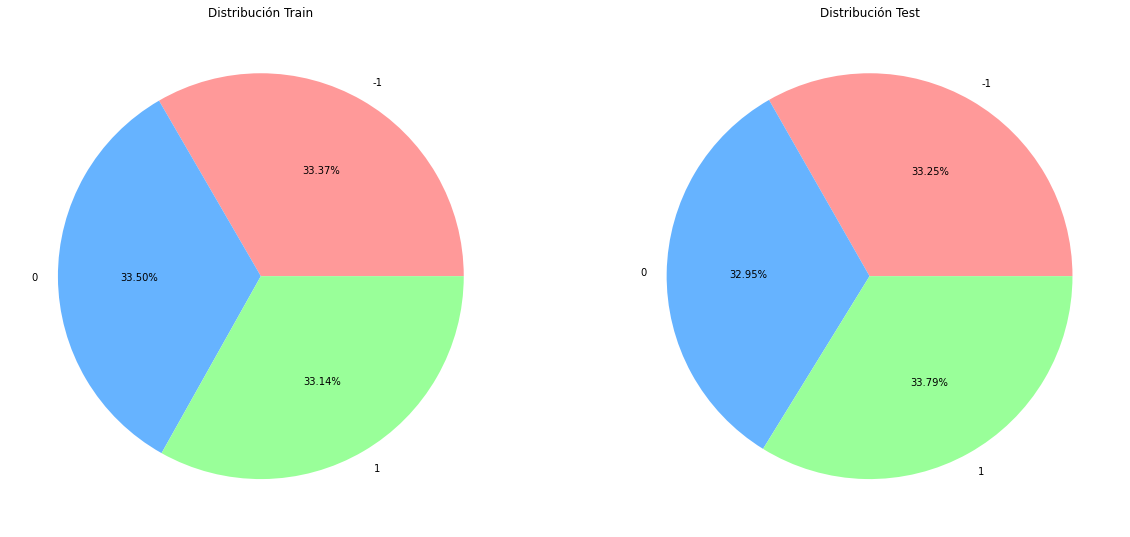

In [66]:
import numpy as np

keys_train, contador_train = np.unique(y_train, return_counts=True)
keys_test, contador_test = np.unique(y_test, return_counts=True)

porcentaje_train = contador_train / np.sum(contador_train)
porcentaje_test = contador_test / np.sum(contador_test)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.pie(porcentaje_train, labels=keys_train, autopct='%.2f%%', colors=colors)
plt.title('Distribución Train')
plt.subplot(1, 2, 2)
plt.pie(porcentaje_test, labels=keys_test, autopct='%.2f%%', colors=colors)
plt.title('Distribución Test')
plt.plot()

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer( max_features=2000, min_df=3)

# Creo el modelo de Bag of Words (bow) con los textos de entrenamiento
X_bow_train = bow.fit_transform(X_train)

X_bow_test = bow.transform(X_test)

In [68]:
# Verifico que hay en el BoW
bow.get_feature_names_out()[0:5]

array(['abrieron', 'abris', 'aceano', 'acompanado', 'activo'],
      dtype=object)

In [69]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelos
bnb = BernoulliNB()
mnb = MultinomialNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
rf_20 = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=5)
rf_50 = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=5)
svm_kernel_lin = SVC(kernel='linear')
svm_kernel_rbf = SVC(kernel='rbf')

# Diccionario con los modelos de clasificación
dict_clasificadores = {
                    'BernoulliNB       ': bnb,
                    'MultinomialNB     ': mnb,
                    'LogisticRegression': lr,
                    'Random Forest d_20': rf_20,
                    'Random Forest d_50': rf_50,
                    'SVM Kernel linear ': svm_kernel_lin,
                    'SVM Kernel rbf    ': svm_kernel_rbf
                    }

# Por cada modelo vamos calculando para los datos de entramento
for key, value in dict_clasificadores.items():
    print ('MODELO: {model_name} \t STATUS: BUILDING'.format(model_name=key))
    value.fit(X_bow_train, y_train)
    print ('MODELO: {model_name} \t STATUS: DONE'.format(model_name=key))
# print('DONE')

MODELO: BernoulliNB        	 STATUS: BUILDING
MODELO: BernoulliNB        	 STATUS: DONE
MODELO: MultinomialNB      	 STATUS: BUILDING
MODELO: MultinomialNB      	 STATUS: DONE
MODELO: LogisticRegression 	 STATUS: BUILDING
MODELO: LogisticRegression 	 STATUS: DONE
MODELO: Random Forest d_20 	 STATUS: BUILDING
MODELO: Random Forest d_20 	 STATUS: DONE
MODELO: Random Forest d_50 	 STATUS: BUILDING
MODELO: Random Forest d_50 	 STATUS: DONE
MODELO: SVM Kernel linear  	 STATUS: BUILDING
MODELO: SVM Kernel linear  	 STATUS: DONE
MODELO: SVM Kernel rbf     	 STATUS: BUILDING
MODELO: SVM Kernel rbf     	 STATUS: DONE


Función que devuelve un classification report de un modelo en forma de un diccionario

Sus parametros son:

    Modelo -> Modelo que se va a evaluar
    Nombre -> Nombre del modelo
    X_train -> Variables de entrada del conjunto de datos de entrenamiento
    X_test -> Variables de entrada del conjunto de datos de test
    y_train -> Variable de salida del conjunto de datos de entrenamiento
    y_test -> Variable de salida del conjunto de datos de test

Dentro de un diccionario tiene como keys:

    Nombre
    Accuracy
    Precision
    Recall
    F1-score

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluation(model, name, X_train, X_test, y_train, y_test):
    print('MODELO: {model_name} \t STATUS: EVALUATING'.format(model_name=name))
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict = {}
    model_dict['nombre_modelo'] = name
    model_dict['accuracy'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1-score'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    print('MODELO: {model_name} \t STATUS: DONE'.format(model_name=name))
    return model_dict

In [71]:
# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in dict_clasificadores.items():
    evaluacion.append(evaluation(
                                    model=model, 
                                    name=key, 
                                    X_train=X_bow_train, 
                                    y_train=y_train,
                                    X_test=X_bow_test, 
                                    y_test=y_test)
                                 )

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df_statistcs_modelos = pd.DataFrame.from_dict(evaluacion)
df_statistcs_modelos.set_index("nombre_modelo", inplace=True)
df_statistcs_modelos

MODELO: BernoulliNB        	 STATUS: EVALUATING
MODELO: BernoulliNB        	 STATUS: DONE
MODELO: MultinomialNB      	 STATUS: EVALUATING
MODELO: MultinomialNB      	 STATUS: DONE
MODELO: LogisticRegression 	 STATUS: EVALUATING
MODELO: LogisticRegression 	 STATUS: DONE
MODELO: Random Forest d_20 	 STATUS: EVALUATING


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



MODELO: Random Forest d_20 	 STATUS: DONE
MODELO: Random Forest d_50 	 STATUS: EVALUATING
MODELO: Random Forest d_50 	 STATUS: DONE
MODELO: SVM Kernel linear  	 STATUS: EVALUATING
MODELO: SVM Kernel linear  	 STATUS: DONE
MODELO: SVM Kernel rbf     	 STATUS: EVALUATING
MODELO: SVM Kernel rbf     	 STATUS: DONE


,accuracy,precision,recall,f1-score
nombre_modelo,,,,
BernoulliNB,0.483764,0.797748,0.483764,0.408374
MultinomialNB,0.467829,0.463959,0.467829,0.378592
LogisticRegression,0.483764,0.797748,0.483764,0.408374
Random Forest d_20,0.410704,0.787423,0.410704,0.310561
Random Forest d_50,0.415815,0.788092,0.415815,0.318374
SVM Kernel linear,0.483764,0.797748,0.483764,0.408374
SVM Kernel rbf,0.483764,0.797748,0.483764,0.408374


In [72]:
# Métricas a pintar
metricas = ["accuracy", "precision", "recall", "f1-score"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_bar_comparison = df_statistcs_modelos.reset_index().melt(id_vars='nombre_modelo').rename(columns=str.title)

df_bar_comparison

,Nombre_Modelo,Variable,Value
0,BernoulliNB,accuracy,0.483764
1,MultinomialNB,accuracy,0.467829
2,LogisticRegression,accuracy,0.483764
3,Random Forest d_20,accuracy,0.410704
4,Random Forest d_50,accuracy,0.415815
5,SVM Kernel linear,accuracy,0.483764
6,SVM Kernel rbf,accuracy,0.483764
7,BernoulliNB,precision,0.797748
8,MultinomialNB,precision,0.463959
9,LogisticRegression,precision,0.797748


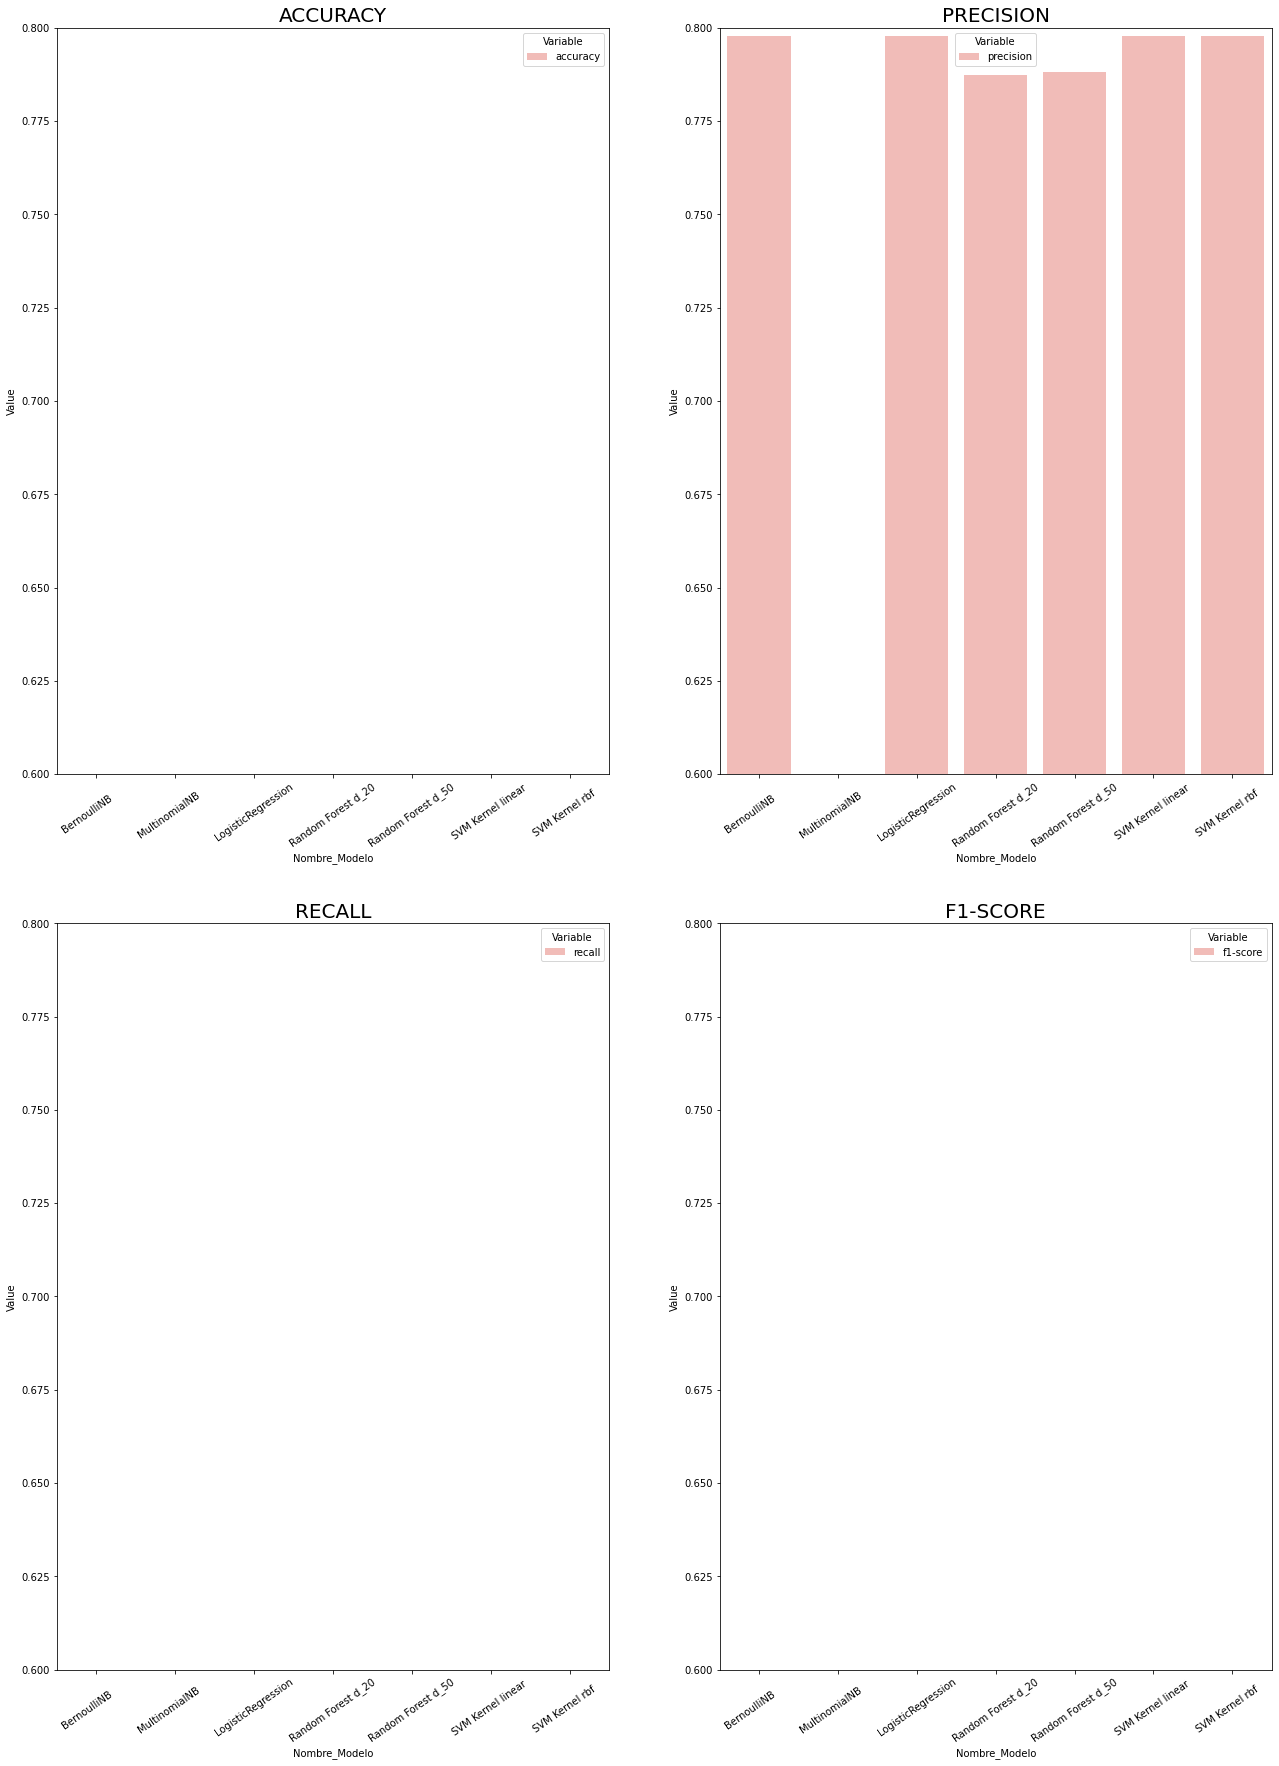

In [73]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(25, 12))
pos = 1
for metrica in metricas:
    df_bar_comparison_graph = df_bar_comparison[df_bar_comparison['Variable'].str.contains(metrica)]
    plt.subplot(2, 2, pos)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=2)
    sns.barplot(x='Nombre_Modelo', y='Value', hue='Variable', data=df_bar_comparison_graph, palette='Pastel1')
    plt.title(metrica.upper(), fontsize=20)
    plt.xticks(rotation=35)
    plt.ylim([0.6, 0.8])
    pos += 1
plt.show()

Funcion para crear el heatmap de las matrices de confusión

Sus parámetros:
    
    cm -> Confusion Matrix
    classes -> polaridad -1, 0, 1
    title -> Titulo de la Gráfica
    cmap -> Paleta de colores de la gráfica

In [74]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.get_cmap('Pastel1')):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    sns.heatmap(cm, linewidth=2, linecolor="white", annot=True, fmt=".0f")
    plt.title(title)
    categorias_comentarios = np.arange(len(classes))
    plt.xticks(categorias_comentarios, classes, rotation=35)
    plt.yticks(categorias_comentarios, classes)
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')    

A continuación -> Matriz de Confusión Modelo: BernoulliNB       


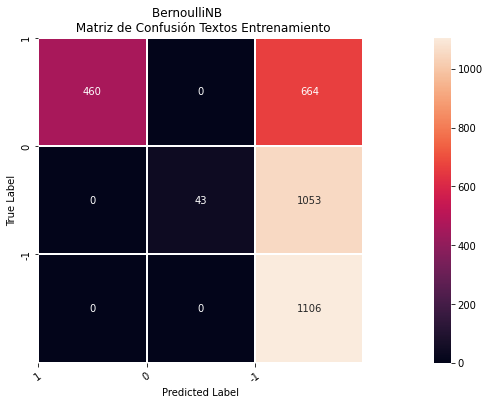

A continuación -> Matriz de Confusión Modelo: MultinomialNB     


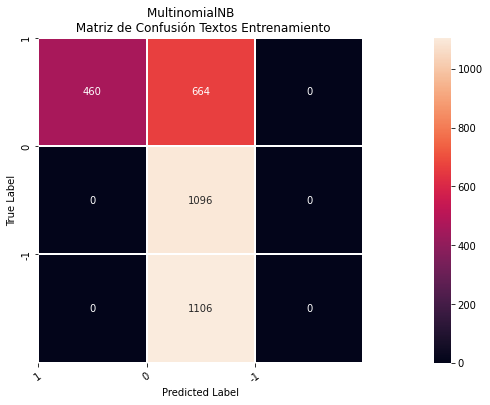

A continuación -> Matriz de Confusión Modelo: LogisticRegression


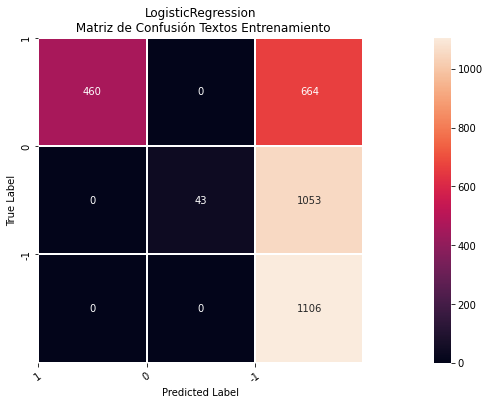

A continuación -> Matriz de Confusión Modelo: Random Forest d_20


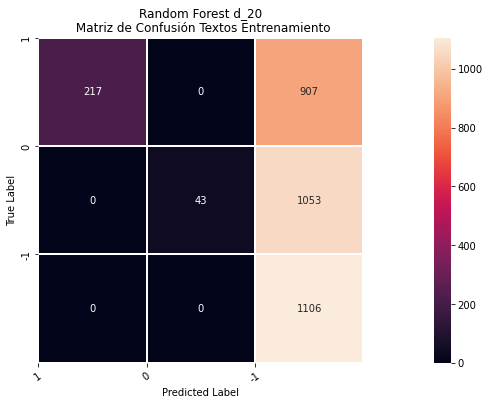

A continuación -> Matriz de Confusión Modelo: Random Forest d_50


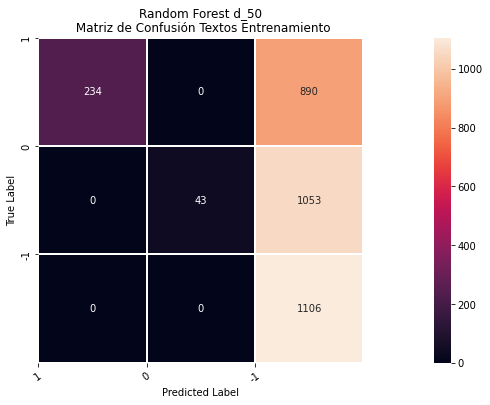

A continuación -> Matriz de Confusión Modelo: SVM Kernel linear 


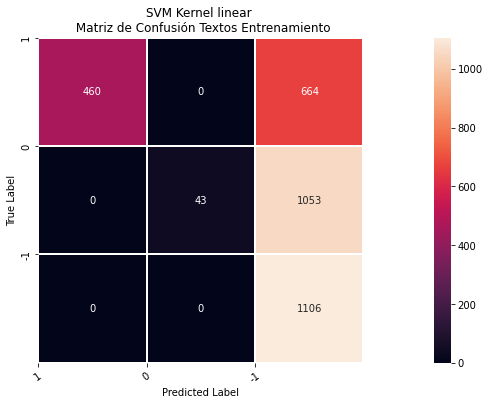

A continuación -> Matriz de Confusión Modelo: SVM Kernel rbf    


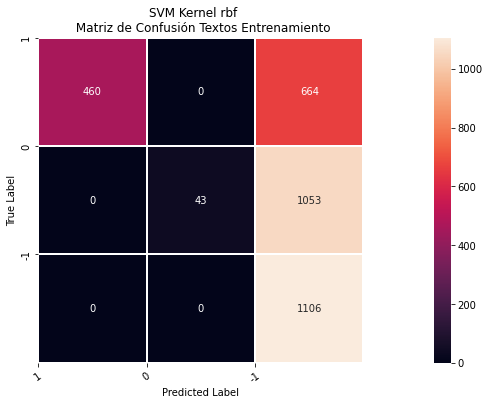

In [75]:
import itertools

from sklearn.metrics import confusion_matrix, classification_report

polaridad = [1, 0, -1]

# Creación de las matrices de confusión 
for key, value in dict_clasificadores.items():
    y_pred_train = value.predict(X_bow_train)
    y_pred_test = value.predict(X_bow_test)
    print ('A continuación -> Matriz de Confusión Modelo: {model}'.format(model=key))
    model = {}
    model['name'] = key
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test, labels=polaridad)
    pos = 0
    plt.figure(figsize=(20, 35))
    pos += 1
    plt.subplot(7, 1, pos)
    plot_confusion_matrix(
                            model['confusion_matrix_test'], 
                            classes=polaridad, 
                            title='{}\n Matriz de Confusión Textos Entrenamiento'.format(model['name'])
                            )
    plt.show()